In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import model_predict
import pickle
import sys, itertools

In [6]:
series, scaler = model_predict.read_data_series(scale=True, filter_early=True)

时间序列连贯


In [12]:
results = pickle.load(open('results.pkl', 'rb'))

results.sort(key=lambda x: x[2])
print('Best:', results[1])

Best: ((2, 2, 2), (1, 0, 3, 12), 18.0)


In [16]:
# 拟合 SARIMA 模型
# order = param_best  # AR 阶数为 1，差分阶数为 0，MA 阶数为 1
order = (2, 2, 2)
seasonal_order = (1, 0, 2, 12)  # 季节性部分：季节 AR 阶数为 1，差分阶数为 0，季节 MA 阶数为 1，季节周期为 12 (假设数据是按月季节性的)
model = SARIMAX(series[:-12], order=order, seasonal_order=seasonal_order)  # 创建 SARIMA 模型对象
results = model.fit()  # 拟合模型，估计模型参数

# 输出模型拟合结果
print(results.summary())

C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   69
Model:             SARIMAX(2, 2, 2)x(1, 0, 2, 12)   Log Likelihood                 -86.418
Date:                            Mon, 29 Jul 2024   AIC                            188.836
Time:                                    20:06:50   BIC                            206.473
Sample:                                01-31-2014   HQIC                           195.815
                                     - 09-30-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2963      0.223     -5.825      0.000      -1.732      -0.860
ar.L2         -0.5375      0.074   

C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 986.74
MAE: 26.63
R^2: 0.14
MAPE: 0.71


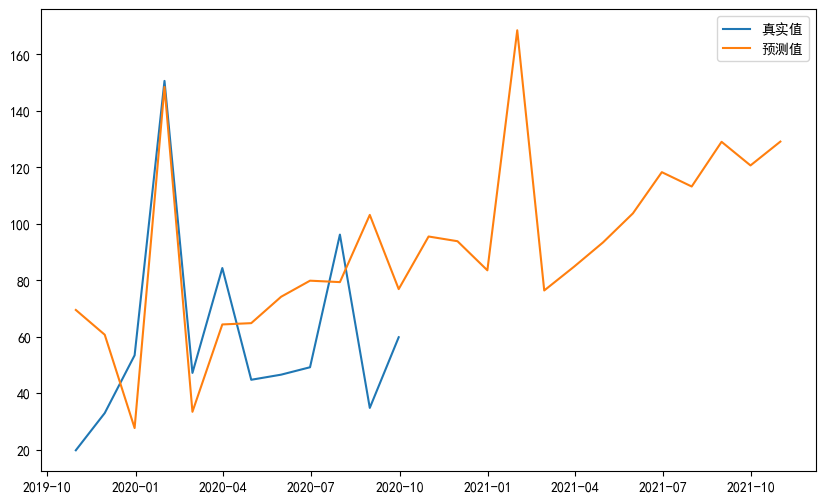

2019-10-31     69.472546
2019-11-30     60.699894
2019-12-31     27.654066
2020-01-31    148.441946
2020-02-29     33.405871
2020-03-31     64.340000
2020-04-30     64.800609
2020-05-31     74.146301
2020-06-30     79.836669
2020-07-31     79.330355
2020-08-31    103.126652
2020-09-30     76.854114
2020-10-31     95.480935
2020-11-30     93.810302
2020-12-31     83.506329
2021-01-31    168.496273
2021-02-28     76.373054
2021-03-31     84.805181
2021-04-30     93.388039
2021-05-31    103.667328
2021-06-30    118.258244
2021-07-31    113.182547
2021-08-31    129.003824
2021-09-30    120.642608
2021-10-31    129.086973
Freq: M, dtype: float64

In [17]:
model_predict.predict_to_future_arima(results, series, scaler, last_months=12)